<a href="https://colab.research.google.com/github/Vicente-VP/Alura_StoreBR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

pd.set_option('display.max_rows', None)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [14]:
faturamento = [float(loja.Preço.sum()),float(loja2.Preço.sum()),float(loja3.Preço.sum()),float(loja4.Preço.sum())]

grafico = {
    'labels': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'values': faturamento
}

<Axes: title={'center': 'Faturamento'}, ylabel='values'>

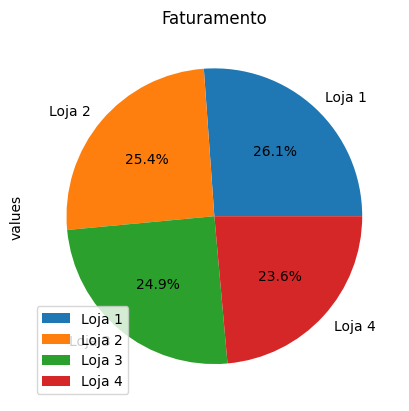

In [25]:
df = pd.DataFrame(grafico)
df.plot.pie(y='values', labels=df['labels'], autopct='%1.1f%%', title="Faturamento")

<Axes: xlabel='labels'>

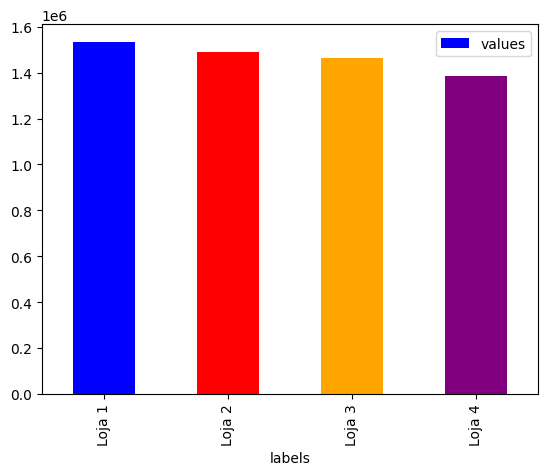

In [23]:
df.plot.bar(x='labels', y='values', color=["blue", "red", "orange", "purple"])

# 2. Vendas por Categoria


In [83]:
cat1 = loja["Categoria do Produto"].value_counts()
cat2 = loja2["Categoria do Produto"].value_counts()
cat3 = loja3["Categoria do Produto"].value_counts()
cat4 = loja4["Categoria do Produto"].value_counts()

df_categorias = pd.concat([cat1, cat2, cat3, cat4], axis=1)
df_categorias.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

<Axes: title={'center': 'Categorias por Loja'}, xlabel='Categoria do Produto'>

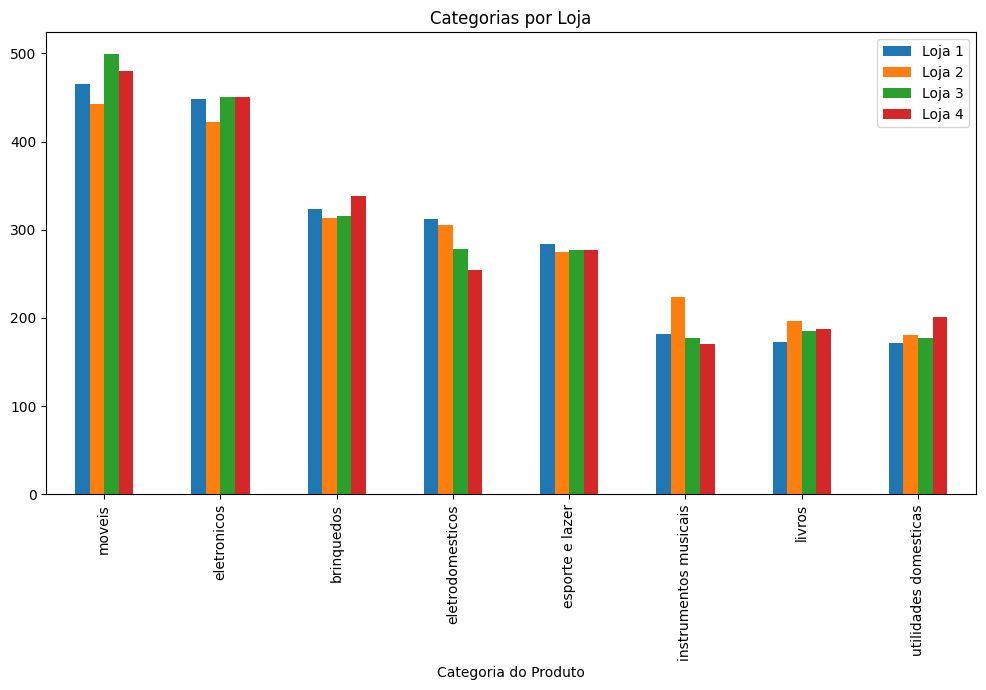

In [44]:
df_categorias.plot(kind='bar', figsize=(12, 6), title='Categorias por Loja')

# 3. Média de Avaliação das Lojas

In [5]:
medias_ava = [float(round(loja['Avaliação da compra'].mean(), 2)), float(round(loja2['Avaliação da compra'].mean(), 2)), float(round(loja3['Avaliação da compra'].mean(), 2)), float(round(loja4['Avaliação da compra'].mean(), 2))]

grafico_media = {
    'labels': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'values': medias_ava
}

medias_ava

[3.98, 4.04, 4.05, 4.0]

<Axes: ylabel='labels'>

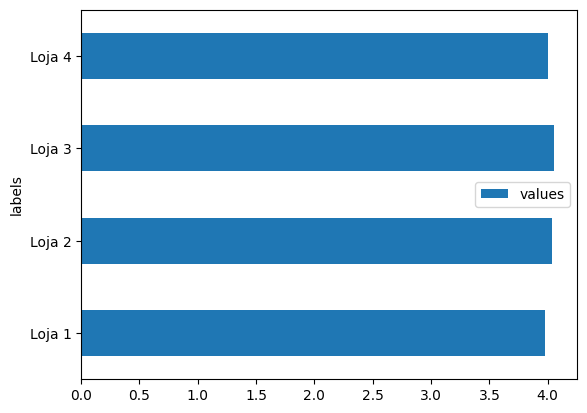

In [59]:
df = pd.DataFrame(grafico_media)
df.plot.barh(x='labels', y='values')

# 4. Produtos Mais e Menos Vendidos

In [80]:
contagem_produtos = loja["Produto"].value_counts()
contagem_produtos2 = loja2["Produto"].value_counts()
contagem_produtos3 = loja3["Produto"].value_counts()
contagem_produtos4 = loja4["Produto"].value_counts()

prod_loja1 = {contagem_produtos.idxmax(): contagem_produtos.max(), contagem_produtos.idxmin(): contagem_produtos.min()}
prod_loja2 = {contagem_produtos2.idxmax(): contagem_produtos2.max(), contagem_produtos2.idxmin(): contagem_produtos2.min()}
prod_loja3 = {contagem_produtos3.idxmax(): contagem_produtos3.max(), contagem_produtos3.idxmin(): contagem_produtos3.min()}
prod_loja4 = {contagem_produtos4.idxmax(): contagem_produtos4.max(), contagem_produtos4.idxmin(): contagem_produtos4.min()}

grafico_prod = {
    'Loja 1': prod_loja1,
    'Loja 2': prod_loja2,
    'Loja 3': prod_loja3,
    'Loja 4': prod_loja4
}

df_produtos = pd.DataFrame(grafico_prod)

<Axes: title={'center': 'Produtos por Loja'}>

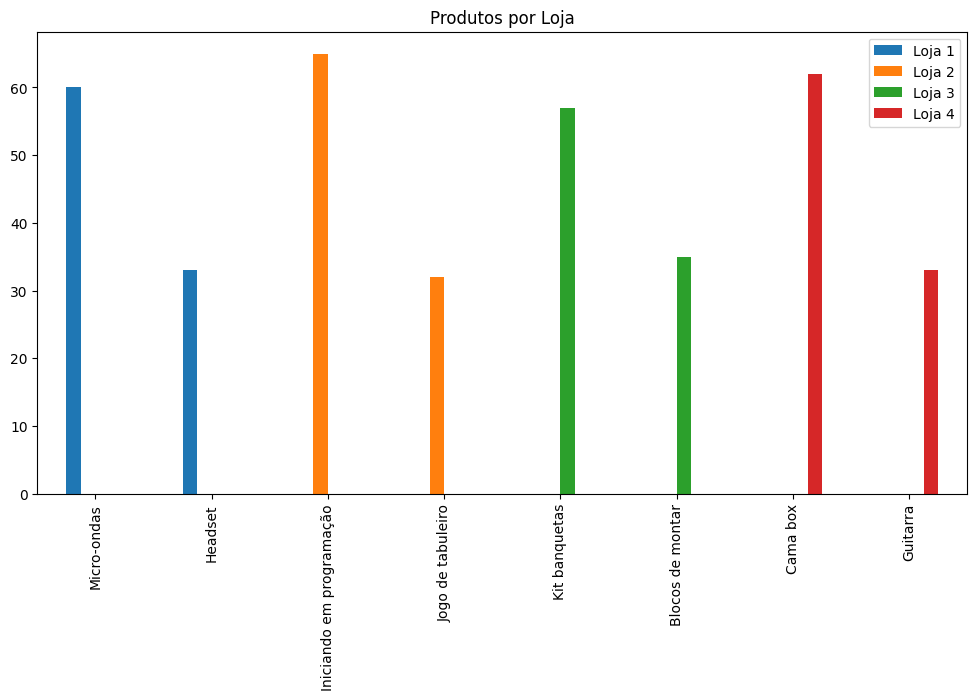

In [84]:
df_produtos.plot.bar(figsize=(12, 6), title='Produtos por Loja')

# 5. Frete Médio por Loja


In [3]:
media_frete = [float(round(loja['Frete'].mean(), 2)), float(round(loja2['Frete'].mean(), 2)), float(round(loja3['Frete'].mean(), 2)), float(round(loja4['Frete'].mean(), 2))]

grafico_frete = {
    'labels': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'values': media_frete
}

<Axes: title={'center': 'Frete Médio por Loja'}, xlabel='labels'>

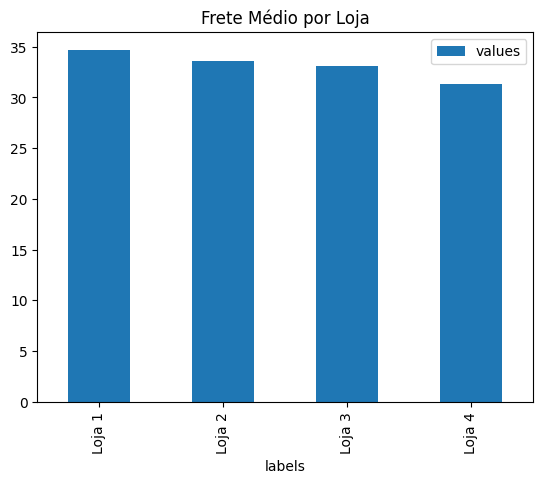

In [4]:
df = pd.DataFrame(grafico_frete)

df.plot(kind='bar', x='labels', y='values', title='Frete Médio por Loja')

# Análise

Após a criação de cada gráfico observamos que:
</br>
### Faturamento

  Loja 1 - Possui o maior faturamento dentre as quatro lojas com **26.1%**

  Loja 2 - Possui o segundo maior faturamento com **25.4%**

  Loja 3 - Possui o terceiro maior faturamento com **24.9%**

  Loja 4 - Possui o quarto e ultimo faturamento em relação as 4 lojas com  **23.6%**

</br>
</br>

### Vendas por Categoria

| Móveis | Eletronicos | Brinquedos | Eletrodosmeticos | Esporte e Lazer | Instrumentos Musicais | Livros | Utilidades Domesticas |
|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| Loja 3 | Loja 1,3 e 4  | Loja 4 | Loja 1 | Loja 1 | Loja 2 | Loja 2 | Loja 4 |

</br>
</br>

### Media de avaliações da Loja

A loja com a maior média de avaliações é a loja três com nota de **4.05**⭐, logo em seguida nós temos a loja dois com **4.04**⭐ de avaliação. E terceiro lugar nós temos a loja quatro com média de **4.0**⭐ e por fim nós temos a loja um com uma média de avaliação de **3.98**⭐.

</br>
</br>

### Produtos Mais e Menos Vendidos

#### Loja 1

|Mais Vendido|Menos Vendido|
|:----------:|:----------:|
|Micro-ondas|HeadSet|

</br>

#### Loja 2

|Mais Vendido|Menos Vendido|
|:----------:|:----------:|
|Iniciando em Programação|Jogo de Tabuleiro|

</br>

#### Loja 3

|Mais Vendido|Menos Vendido|
|:----------:|:----------:|
|Kit Banquetas|Blocos de Montar|

</br>

#### Loja 4

|Mais Vendido|Menos Vendido|
|:----------:|:----------:|
|Cama Box|Guitarra|

</br>
</br>

### Frete Médio por Loja

A loja com o maior frete médio é a loja 1, logo podemos perceber que ela entrega produtos para lugares mais longes. Logo em seguidas temos a loja 2 e assim por diante, sendo a loja 4 com menor frete.  


# Conclusão
Baseado nas análises realizadas, podemos concluir que a loja 4 deve ser vendida, pois ela rende menos faturamento, tem a terceira pior nota entre as 4 e também não atinge regiões mais afastadas.  